In [16]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<hr style="border: 2px solid #fb04ff; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#fb04ff;">
    🧠 1. EDA📊
</h1>
<hr style="border: 2px solid #fb04ff; width: 80%;">



In [17]:
# Load the dataset
df = pd.read_csv(r'F:\DS & AI Bootcamp Material\Session Material\Session 2\practise\House Price Prediction\dataset\housing_data.csv')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


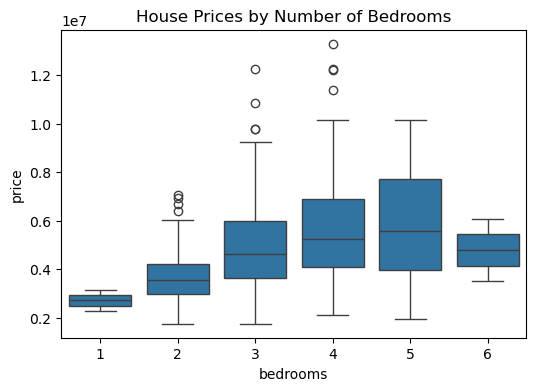

In [30]:
# Exploratory Data Analysis
plt.figure(figsize=(6, 4))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('House Prices by Number of Bedrooms')
plt.show()

In [20]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
    return outlier_indices

outlier_indices = outliers(df, 'price')

# show outliers in a dataframe format
df.loc[outlier_indices]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


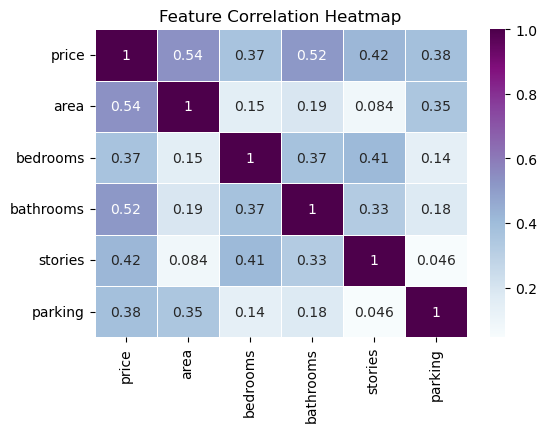

In [29]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

<hr style="border: 2px solid #fb04ff; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#fb04ff;">
    🧠 2. Feature Engineering📊
</h1>
<hr style="border: 2px solid #fb04ff; width: 80%;">



In [22]:
# Select features and target
features = [
    'area', 'bedrooms', 'bathrooms', 'stories', 
    'mainroad', 'guestroom', 'basement', 
    'hotwaterheating', 'airconditioning', 
    'parking', 'prefarea'
]

X = df[features]
y = df['price']

In [23]:
# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'])

In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<hr style="border: 2px solid #fb04ff; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#fb04ff;">
    🧠 3. Model Fitting📊
</h1>
<hr style="border: 2px solid #fb04ff; width: 80%;">



In [26]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [27]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred) # Mean Squared Error
r2 = r2_score(y_test, y_pred)

print('Model Performance Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Model Performance Metrics:
Mean Absolute Error: 1037357.2487767584
R-squared: 0.6106744320170532


In [28]:
# Save model and preprocessing artifacts
import joblib

joblib.dump(rf_model, '../src/trained_model.pkl')
joblib.dump(scaler, '../src/scaler.pkl')

with open('../src/feature_names.txt', 'w') as f:
    f.write('\n'.join(X.columns))